## Step 1 :

**Import Basic Scikit Learn Libraries for Data Manipulation as well Data Visualization.**

In [39]:
# import Data Manipulation Libraries
import numpy as np
import pandas as pd

# import Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# import Data Filter Libraries
import warnings
warnings.filterwarnings('ignore')

# import Data Logging Libraries
import logging 
logging.basicConfig(level=logging.INFO,
                    filename= 'model.log',
                    filemode= 'w',
                    format='%(asctime)s - %(levelname)s - %(message)s')

## Step 2 :

**Data Uploding using Pandas Function**

In [40]:
# Load the dataset
url = 'https://raw.githubusercontent.com/Arbajshaikh7030/CementCompositeStrength_PredictionModel/refs/heads/main/concrete_data.csv'

df = pd.read_csv(url)

df.sample(frac = 1)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
652,102.0,153.0,0.0,192.0,0.0,887.0,942.0,3,4.57
618,254.0,0.0,0.0,198.0,0.0,968.0,863.0,90,26.94
336,275.1,0.0,121.4,159.5,9.9,1053.6,777.5,28,51.33
153,323.7,282.8,0.0,183.8,10.3,942.7,659.9,56,80.20
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
...,...,...,...,...,...,...,...,...,...
389,500.1,0.0,0.0,200.0,3.0,1124.4,613.2,28,44.13
401,475.0,0.0,0.0,162.0,9.5,1044.0,662.0,28,58.52
428,250.0,0.0,95.7,191.8,5.3,948.9,857.2,14,24.66
418,251.4,0.0,118.3,192.9,5.8,1043.6,754.3,3,11.98


## Step 3 :

**Doing Exploratory Data Analysis [EDA] :-->**

1. Univariate Analysis 

2. Bi variate Analysis 

In [41]:
from collections import OrderedDict

stats = []
for i in df.columns: 
    numarical_stats = OrderedDict({
        'feature' :i,
        'type': df[i].dtype,
        'Missing Values': df[i].isnull().sum(),
        'Unique Values': df[i].nunique(),
        'Min': df[i].min,
        'Max': df[i].max,
        'Mode': df[i].mode().values[0],
        'Mean': df[i].mean(),
        'Median': df[i].median(),
        'mode': df[i].mode()[0],
        'stander Deviation': df[i].std(),
        'Kurtosis': df[i].kurtosis(),
        'IQR': df[i].quantile(0.75) - df[i].quantile(0.25)
    })

    stats.append(numarical_stats)

df_stats = pd.DataFrame(stats)

df_stats.style.background_gradient(subset=['Missing Values', 'Unique Values', 'Mean', 'Median', 'Mode', 'Kurtosis', 'IQR'], cmap='Reds')

,feature,type,Missing Values,Unique Values,Min,Max,Mode,Mean,Median,mode,stander Deviation,Kurtosis,IQR
0,cement,float64,0,278,,,362.600000,281.167864,272.900000,362.600000,104.506364,-0.520652,157.625000
1,blast_furnace_slag,float64,0,185,,,0.000000,73.895825,22.000000,0.000000,86.279342,-0.508175,142.950000
2,fly_ash,float64,0,156,,,0.000000,54.188350,0.000000,0.000000,63.997004,-1.328746,118.300000
3,water,float64,0,195,,,192.000000,181.567282,185.000000,192.000000,21.354219,0.122082,27.100000
4,superplasticizer,float64,0,111,,,0.000000,6.204660,6.400000,0.000000,5.973841,1.411269,10.200000
5,coarse_aggregate,float64,0,284,,,932.000000,972.918932,968.000000,932.000000,77.753954,-0.599016,97.400000
6,fine_aggregate,float64,0,302,,,594.000000,773.580485,779.500000,594.000000,80.175980,-0.102177,93.050000
7,age,int64,0,14,,,28.000000,45.662136,28.000000,28.000000,63.169912,12.168989,49.000000
8,concrete_compressive_strength,float64,0,845,,,33.400000,35.817961,34.445000,33.400000,16.705742,-0.313725,22.425000


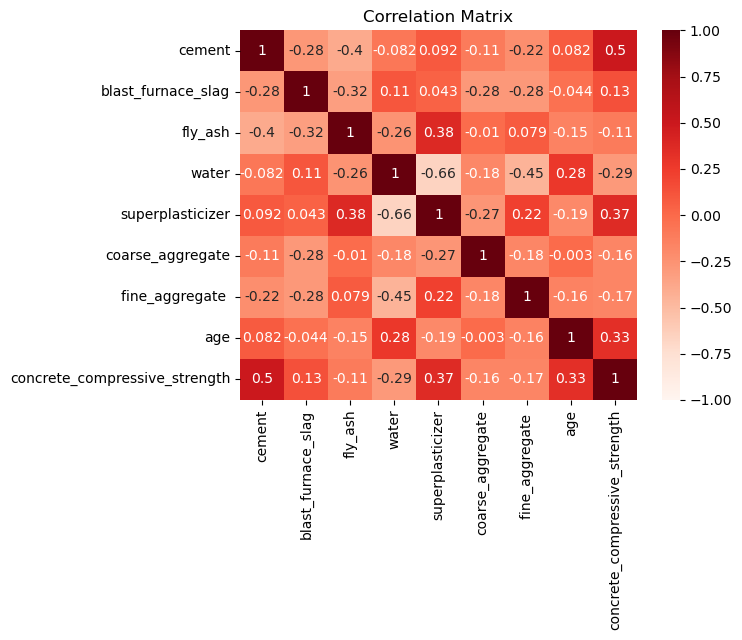

In [42]:
# Checking Correlation Matrix
# X = Independent Variables
# y = Dependent Variable ---->['concrete_compressive_strength']

sns.heatmap(df.corr(), annot=True, yticklabels=True, center=0,vmax=1,vmin=-1, cmap='Reds') 
plt.title('Correlation Matrix')
plt.show()

In [43]:
# Understanding Feature and creat New feature Based on Exisiting Feature ----> (Feature Engineerng)

df.corr()['concrete_compressive_strength']

cement                           0.497832
blast_furnace_slag               0.134829
fly_ash                         -0.105755
water                           -0.289633
superplasticizer                 0.366079
coarse_aggregate                -0.164935
fine_aggregate                  -0.167241
age                              0.328873
concrete_compressive_strength    1.000000
Name: concrete_compressive_strength, dtype: float64

In [44]:
df['Composite_Ratio'] = (df['cement'] + df['blast_furnace_slag'] + df['superplasticizer'])/(df['water']  )

In [45]:
df.corr()['concrete_compressive_strength']

cement                           0.497832
blast_furnace_slag               0.134829
fly_ash                         -0.105755
water                           -0.289633
superplasticizer                 0.366079
coarse_aggregate                -0.164935
fine_aggregate                  -0.167241
age                              0.328873
concrete_compressive_strength    1.000000
Composite_Ratio                  0.620196
Name: concrete_compressive_strength, dtype: float64

In [46]:
df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength,Composite_Ratio
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,3.348765
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,3.348765
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,2.083333
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,2.083333
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,1.723958
...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,2.234410
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18,1.696939
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70,1.525688
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77,2.033599


In [47]:
df['cement_to_water_ratio'] = (df['cement'])/(df['water'])

In [48]:
df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength,Composite_Ratio,cement_to_water_ratio
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,3.348765,3.333333
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,3.348765,3.333333
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,2.083333,1.458333
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,2.083333,1.458333
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,1.723958,1.034375
...,...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,2.234410,1.538976
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18,1.696939,1.643878
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70,1.525688,0.770628
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77,2.033599,0.906036


In [49]:
df.corr()['concrete_compressive_strength']

cement                           0.497832
blast_furnace_slag               0.134829
fly_ash                         -0.105755
water                           -0.289633
superplasticizer                 0.366079
coarse_aggregate                -0.164935
fine_aggregate                  -0.167241
age                              0.328873
concrete_compressive_strength    1.000000
Composite_Ratio                  0.620196
cement_to_water_ratio            0.559522
Name: concrete_compressive_strength, dtype: float64

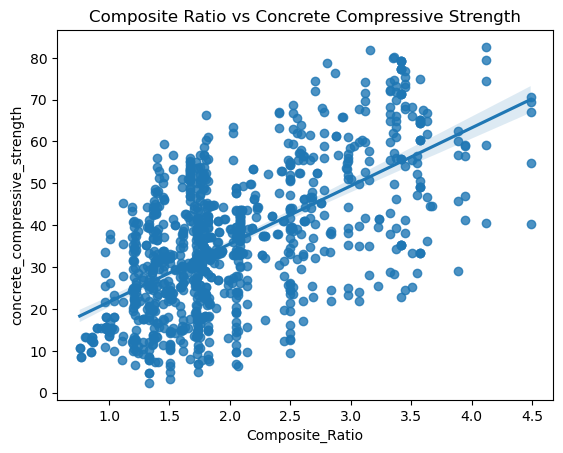

In [50]:
sns.regplot(x=df['Composite_Ratio'], y=df['concrete_compressive_strength'])
plt.title('Composite Ratio vs Concrete Compressive Strength')
plt.show()

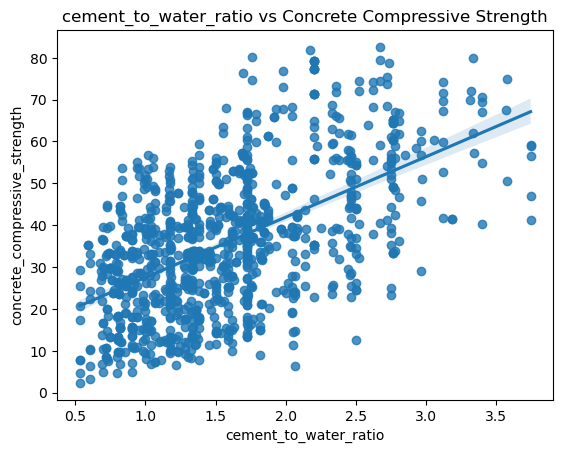

In [51]:
sns.regplot(x=df['cement_to_water_ratio'], y=df['concrete_compressive_strength'])
plt.title('cement_to_water_ratio vs Concrete Compressive Strength')
plt.show()

### Step 4 :

Spliting the dataset into training set and test set also Using Train And Test Split To Prevent Data Leakage.


In [54]:
from sklearn.model_selection import train_test_split

X = df.drop('concrete_compressive_strength', axis=1)

y = df['concrete_compressive_strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [55]:
# Using Scaling Technique
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred_LR = LR.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score, mean_squared_error

r2_score_LR = r2_score(y_test, y_pred_LR)

r2_score_LR

0.5941935306287764